In [46]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [49]:
#load the data
wine = load_wine()
print(wine.keys())
print(wine.target)
print(wine.target_names)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


In [51]:
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [52]:
# Create a target column with the dataset target
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [53]:
# print the target_names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [55]:
# print the first 5 rows of the dataset
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#make sure that the columns have the correct label

In [56]:
#print the shape of the dataset
df_wine.shape

(178, 14)

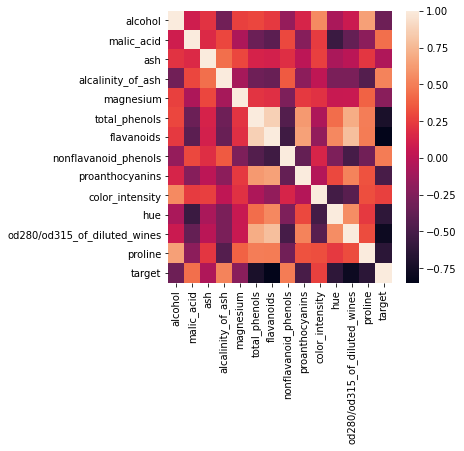

In [57]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(df_wine.corr())
plt.show()

In [70]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od280/od315_of_diluted_wines']
features

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'proline',
 'od280/od315_of_diluted_wines']

In [74]:
#set X to features and y to target
X = df_wine[features]
y = df_wine.target

In [76]:
#normalize fetures
scale = StandardScaler()
norm = scale.fit_transform(X)
norm[0:5]

array([[-1.16959318,  0.80899739,  1.03481896,  0.36217728,  1.01300893,
         1.84791957],
       [-2.49084714,  0.56864766,  0.73362894,  0.40605066,  0.96524152,
         1.1134493 ],
       [-0.2687382 ,  0.80899739,  1.21553297,  0.31830389,  1.39514818,
         0.78858745],
       [-0.80925118,  2.49144552,  1.46652465, -0.42754369,  2.33457383,
         1.18407144],
       [ 0.45194578,  0.80899739,  0.66335127,  0.36217728, -0.03787401,
         0.44960118]])

In [78]:
#split train and test data with 80/20 split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 99)
X_train[0:5]

,alcalinity_of_ash,total_phenols,flavanoids,hue,proline,od280/od315_of_diluted_wines
161,20.0,1.83,0.56,0.96,680.0,1.82
92,20.7,1.38,1.46,0.96,495.0,2.06
94,18.0,3.02,2.26,1.16,345.0,2.96
174,23.0,1.80,0.75,0.70,750.0,1.56
24,20.0,2.53,2.61,1.12,845.0,3.82


In [81]:
#Now, we classify with a Random forest
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, y_train)
rfc.predict(X_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0])

In [82]:
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))

Training Score: 1.0
Testing Score: 0.9722222222222222


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [84]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [85]:
print('Training Score: {}'.format(knn.score(X_train, y_train)))
print('Testing Score: {}'.format(knn.score(X_test, y_test)))

Training Score: 0.7535211267605634
Testing Score: 0.75


In [86]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=99)
svc.fit(X_train, y_train)

SVC(random_state=99)

In [88]:
print('Training Score: {}'.format(svc.score(X_train, y_train)))
print('Testing Score: {}'.format(svc.score(X_test, y_test)))

Training Score: 0.7183098591549296
Testing Score: 0.7777777777777778


In [89]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [90]:
print('Training Score: {}'.format(gnb.score(X_train, y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, y_test)))

Training Score: 0.9507042253521126
Testing Score: 0.9444444444444444
